In [2]:
import mysql.connector
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='password',
    database='naxos_db'
)

query = """
SELECT
    a.release_date,
    p.period
FROM Album AS a
JOIN AlbumPeriod AS p ON p.catalogue_no = a.catalogue_no
"""

df = pd.read_sql(query, connection)
connection.close()

df.release_date = pd.to_datetime(df.release_date)
df.head()

C:\Users\jakob\AppData\Local\Temp\ipykernel_15540\1343967707.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,release_date,period
0,2014-01-01,20th Century
1,2014-01-01,Contemporary
2,NaT,20th Century
3,2013-01-01,20th Century
4,2013-12-01,20th Century


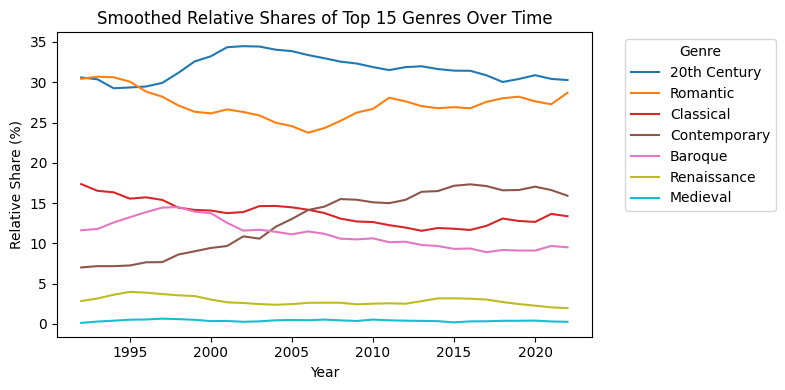

In [8]:
df['year'] = df['release_date'].dt.year

genre_trends = df.query('year >= 1990').groupby(['year', 'period']).size().unstack(fill_value=0)
top_15_genres = genre_trends.sum().nlargest(15).index
genre_trends = genre_trends[top_15_genres]

genre_trends_relative = genre_trends.div(genre_trends.sum(axis=1), axis=0) * 100  # convert to percentage
genre_trends_smoothed = genre_trends_relative.rolling(window=5, center=True).mean()

genre_trends_smoothed.plot(kind='line', figsize=(8, 4), colormap='tab10')

plt.title('Smoothed Relative Shares of Top 15 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Relative Share (%)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
